<a href="https://colab.research.google.com/github/Gabriela-Pacek/ML_project/blob/main/Final_clustering_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriela Pacek

Analyzed enzymes: BSS (benzyl succinate synthase) isoforms, isolated from various bacteria. 

Data source: brenda-enzymes

Analyzed parameters: molecular weight, number of amino acids, microorganism.

Method: clustering

Code was written with a lot of help from the following sites:
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Plotting-a-Dendrogram
https://github.com/marcinwolter/MachineLearning2020/blob/main/plot_linkage_comparison.ipynb
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns

Stack overflow


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lk
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [28]:
url = 'https://raw.githubusercontent.com/Gabriela-Pacek/ML_project/main/ML_database_final.csv'
df = pd.read_csv(url,index_col=0)
print(df.head())
enz=df.values
print(enz[0:4])

                               'ORGANISM '  ...  Unnamed: 9
ENTRY NAME '                                ...            
BSSA_THAAR '          'Thauera aromatica '  ...         NaN
BSSB_THAAR '          'Thauera aromatica '  ...         NaN
BSSC_THAAR '          'Thauera aromatica '  ...         NaN
W8SQ38_ECOLX '         'Escherichia coli '  ...         NaN
A0A1C9UK74_9PROT '  'Magnetospirillum sp '  ...         NaN

[5 rows x 9 columns]
[["'Thauera aromatica '" 861 97736 825 40 712 1 0 nan]
 ["'Thauera aromatica '" 74 8752 0 0 0 2 1 nan]
 ["'Thauera aromatica '" 57 6619 0 0 0 3 0 nan]
 ["'Escherichia coli '" 810 90124 786 11 682 1 0 nan]]


In [29]:
aa_m=np.array(enz[:245,[1,2,3,4,5,6,7]])

print(aa_m)

[[861 97736 825 ... 712 1 0]
 [74 8752 0 ... 0 2 1]
 [57 6619 0 ... 0 3 0]
 ...
 [864 97492 828 ... 726 1 0]
 [864 97558 828 ... 726 1 0]
 [810 90188 786 ... 682 1 0]]


In [30]:
#print(kmeans(enz_aa, k=3, normalize=False, limit=500))

[[ 0.82568929  0.86148925 -0.06396696 ...  0.77630184 -0.15061881
  -0.15844432]
 [-2.09738573 -2.09375178 -0.06412377 ... -2.18942587  1.32544551
   6.31136541]
 [-2.16052712 -2.16459069 -0.06412377 ... -2.18942587  2.80150983
  -0.15844432]
 ...
 [ 0.83683189  0.85338578 -0.06396639 ...  0.83461671 -0.15061881
  -0.15844432]
 [ 0.83683189  0.8555777  -0.06396639 ...  0.83461671 -0.15061881
  -0.15844432]
 [ 0.63626512  0.61081318 -0.06397438 ...  0.6513414  -0.15061881
  -0.15844432]]


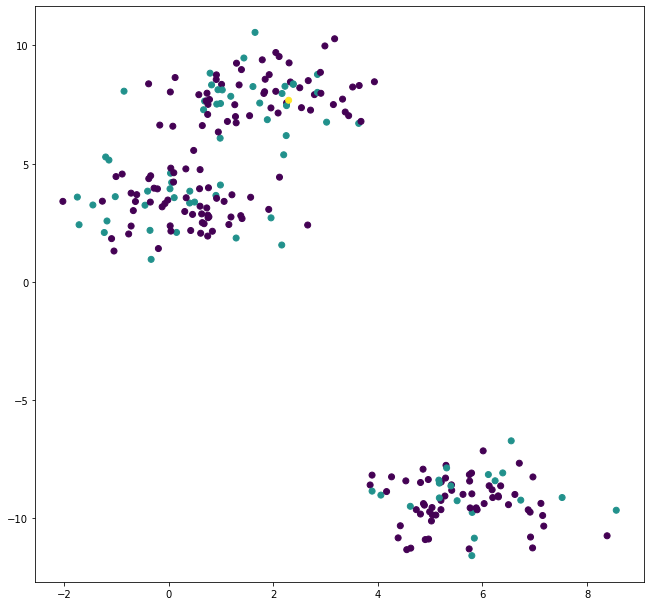

In [31]:
%matplotlib inline

plt.figure(figsize=(24, 36))

n_samples = 245
random_state = 20
X, y = make_blobs(n_samples=n_samples, random_state=random_state, n_features=7)
aa_m_scaled = sklearn.preprocessing.scale(aa_m)
print(aa_m_scaled)
kmeans = KMeans(init="random", n_clusters=3, n_init=15, max_iter=100, random_state=10)
kmeans.fit(aa_m_scaled)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(aa_m_scaled)

plt.subplot(321)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

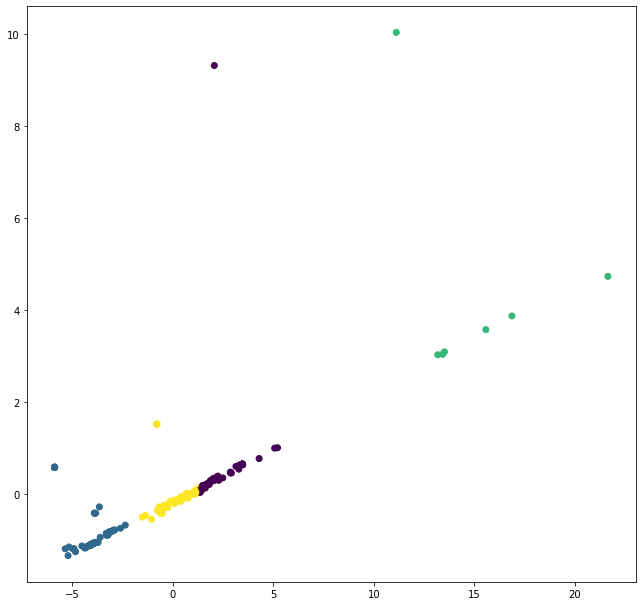

In [32]:
transformation = [[0.49, -0.6], [0.35, 0.99], [0.5,0.6], [2,0.5], [1.5, 0.1], [0.1,0.7], [0.8,0.3]]
aa_m_aniso = np.dot(aa_m_scaled, transformation)
y_pred = KMeans(n_clusters=4, random_state=50).fit_predict(aa_m_aniso)
plt.figure(figsize=(24, 36))
plt.subplot(324)
plt.scatter(aa_m_aniso[:, 0], aa_m_aniso[:, 1], c=y_pred)

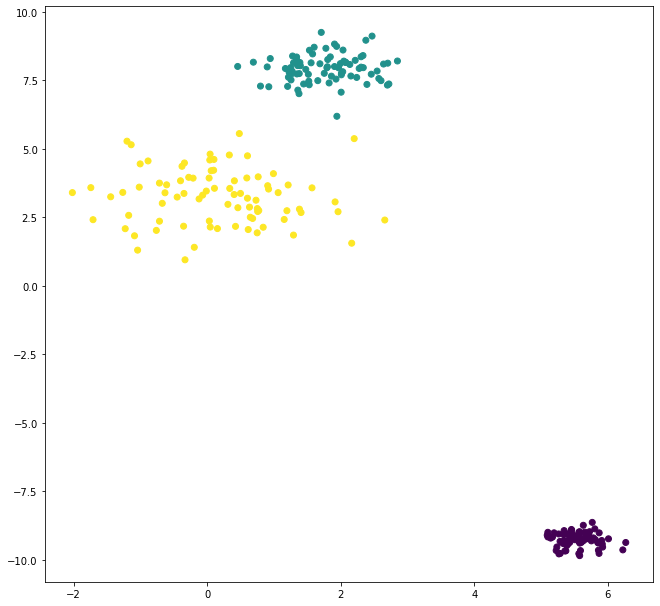

      aa   mass glycil_radical pfl_start pfl_end subunit TuT_G  Cluster
0    861  97736            825        40     712       1     0        0
1     74   8752              0         0       0       2     1        2
2     57   6619              0         0       0       3     0        2
3    810  90124            786        11     682       1     0        0
4    620  69357              0         1     598       1     0        0
..   ...    ...            ...       ...     ...     ...   ...      ...
240  862  97613            826        42     724       1     0        0
241  864  97622            828        44     726       1     0        0
242  864  97492            828        44     726       1     0        0
243  864  97558            828        44     726       1     0        0
244  810  90188            786        11     682       1     0        0

[245 rows x 8 columns]


In [33]:
aa_m_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[0.50, 1.0, 0.25],
                                random_state=random_state, n_features=7)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(aa_m_varied)
plt.figure(figsize=(24, 36))
plt.subplot(325)
plt.scatter(aa_m_varied[:, 0], aa_m_varied[:, 1], c=y_pred)
plt.show()


df = pd.DataFrame(aa_m, columns=['aa', 'mass', 'glycil_radical', 'pfl_start', 'pfl_end', 'subunit', 'TuT_G'])

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(df[['aa', 'mass', 'glycil_radical', 'pfl_start', 'pfl_end', 'subunit', 'TuT_G']])

df['Cluster'] = y

print(df)

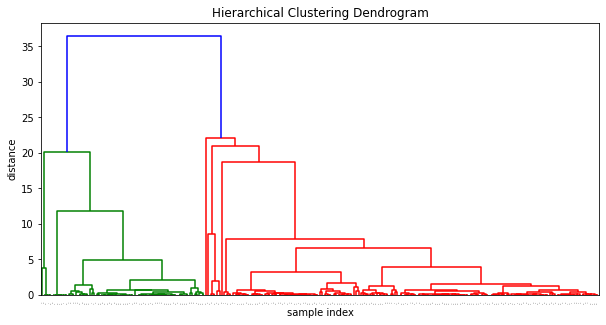

In [34]:
WARD=lk(aa_m_scaled, 'ward')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    WARD,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

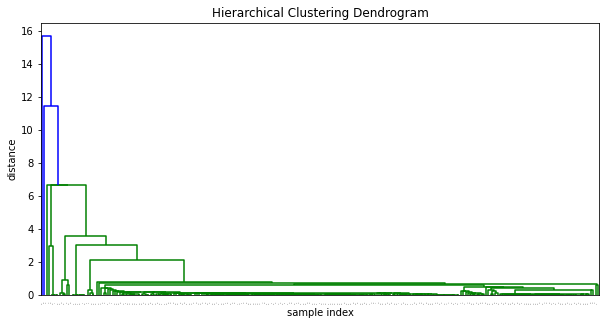

In [35]:

#single linkage ->porpóbować, powinien mieć najwiecej sensu
SINGLE_LINKAGE=lk(aa_m_scaled, 'single')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    SINGLE_LINKAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()

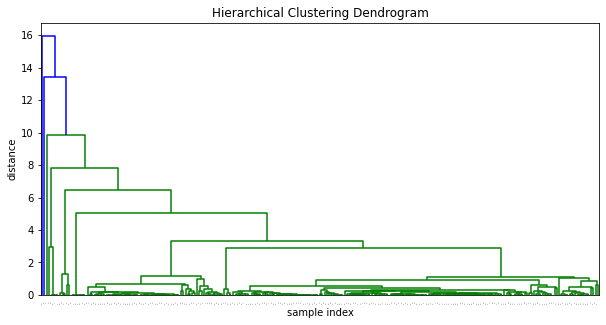

In [36]:
AVERAGE=lk(aa_m_scaled, 'average')
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    AVERAGE,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=0.,  # font size for the x axis labels
)
plt.show()